## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
    - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
    - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
    - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
    - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
    - 불편분산은 n대신 n-1로 나누어 구할 수 있다.


[표분분산이 분산을 과소 평가하는 이유]
    
    호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
    이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
    표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.


### 데이터불러오기

In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv('ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [42]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [43]:
scores_df = pd.DataFrame({'score': scores}, 
                         index = pd.Index([i for i in 'ABCDEFGHIJ'], name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 데이터 중심의 지표

#### 평균값

In [44]:
#방법1

sum(scores)/len(scores)

55.0

In [45]:
#방법2

scores.mean(), scores_df.mean()

(55.0,
 score    55.0
 dtype: float64)

In [46]:
#방법3

np.mean(scores)

55.0

#### 중앙값

In [47]:
#방법1

sorted_scores = sorted(scores)   #정렬방법1
sorted_scores = np.sort(scores)  #정렬방법2

n = len(sorted_scores)

if n//2 == 0:
    median = sorted_scores[int(n/2+1)]
else:
    m1 = sorted_scores[int((n-1)/2)]
    m2 = sorted_scores[int((n+1)/2)]
    median = (m1+m2)/2
    
median

56.5

In [48]:
#방법2

scores_df.median()

score    56.5
dtype: float64

In [49]:
#방법3

np.median(sorted_scores)

56.5

#### 최빈값

In [50]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [51]:
pd.Series([1,2,3,4,5,6]).mode()

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

### 데이터의 산포도 지표

#### 편차
- 각 데이터가 평균으로부터 어느정도 떨어져 있는가를 나타내는 지표

In [52]:
#방법1

mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [53]:
## 편차의 평균
np.mean(deviation)

0.0

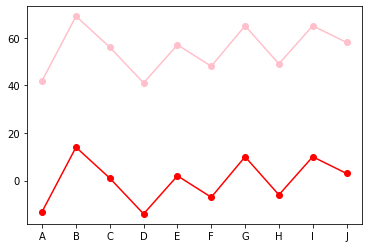

In [54]:
## raw 값과 편차 값을 도표화

import matplotlib.pyplot as plt

summary_df = scores_df.copy()
summary_df['deviation'] = deviation

plt.plot(summary_df['score'], marker = 'o', color = 'pink')
plt.plot(summary_df['deviation'], marker = 'o', color = 'red')

In [55]:
## 데이터프레임의 평균

summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

#### 분산
- 편차의 제곱
- 편차의 평균이 항상 0이 되는 것 때문에 사용하는 지표

In [56]:
# 방법1

np.var(scores)

86.0

In [57]:
# 방법2

np.mean(deviation**2)

86.0

In [58]:
# 방법3

scores_df.var(ddof = 0)   # pandas var함수의 default는 불편분산임
                          # 따라서, ddof = 0으로 표본분산을 계산하도록 함

score    86.0
dtype: float64

In [59]:
# 방법4

summary_df['square of deviation'] = np.square(deviation)
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

#### 표준편차
- 분산의 양의 제곱근
- raw 데이터의 단위와 통일해주기 위한 지표

In [60]:
# 방법1

np.sqrt(np.var(scores, ddof = 0))

9.273618495495704

In [61]:
# 방법2

np.std(scores, ddof = 0)

9.273618495495704

#### 범위
- 데이터 전체가 아닌 최댓값, 최솟값으로 산포도를 표현
- 최댓값-최솟값

In [62]:
np.max(scores) - np.min(scores)

28

#### 사분위범위
- 75% 상위수에 위치하는 값과 25% 하위수에 위치하는 값의 차이를 취함
- Q3-Q1

In [63]:
# 방법1

scores_q1 = np.percentile(scores, 25)
scores_q3 = np.percentile(scores, 75)
scores_iqr = scores_q3 - scores_q1
scores_iqr

15.0

In [64]:
# 방법2

scores_des = pd.Series(scores).describe()
scores_des['75%'] - scores_des['25%']

15.0

### 과제

#### 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하기

In [65]:
import numpy as np
import random

arr = np.array(np.random.randint(0,100,20))

print(f'배열의 평균: {arr.mean().round(1)}')
print(f'배열의 편차: {(arr - arr.mean()).round(1)}')
print(f'편차의 합: {(arr - arr.mean()).sum().round(1)}')

배열의 평균: 44.4
배열의 편차: [-11.4 -21.4 -20.4 -17.4  38.6  11.6 -10.4 -32.4  41.6   0.6   9.6  25.6
 -19.4 -26.4  28.6  -8.4  -0.4  47.6  -1.4 -34.4]
편차의 합: 0.0


#### 중앙값 > 평균값인 경우와 중앙값 < 평균값인 두가지 집합에서 나타나는 가능성 있는 특징을 사례로 설명하기

In [66]:
#중앙값 > 평균값
arr1 = np.array([-100,1,1,1,2,2,2,2,3])
print(np.median(arr1), np.mean(arr1))


#중앙값 < 평균값
arr2 = np.array([1,2,3,3,4,4,4,5,100])
print(np.median(arr2), np.mean(arr2))   

2.0 -9.555555555555555
4.0 14.0


#### 4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치 산출하는 과정을 설명하기

In [67]:
arr = np.array([0.1,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,5,5,6,6,6,20])

arr_q1 = np.percentile(arr, 25)
arr_q3 = np.percentile(arr, 75)
arr_iqr = arr_q3 - arr_q1
lower_whisker = arr_q1 - 1.5*arr_iqr
upper_whisker = arr_q3 + 1.5*arr_iqr

print(f'1분위수: {arr_q1}')
print(f'3분위수: {arr_q3}')
print(f'사분위범위: {arr_iqr}')
print(f'{lower_whisker} 보다 작은 수, {upper_whisker} 보다 큰 수는 이상치로 분류됨')

outlier = []
for i in arr:
    if i < lower_whisker or i > upper_whisker:
        outlier.append(i)
        
print(f'이상치: {outlier}')

1분위수: 1.5
3분위수: 4.5
사분위범위: 3.0
-3.0 보다 작은 수, 9.0 보다 큰 수는 이상치로 분류됨
이상치: [20.0]


<AxesSubplot:xlabel='arr'>

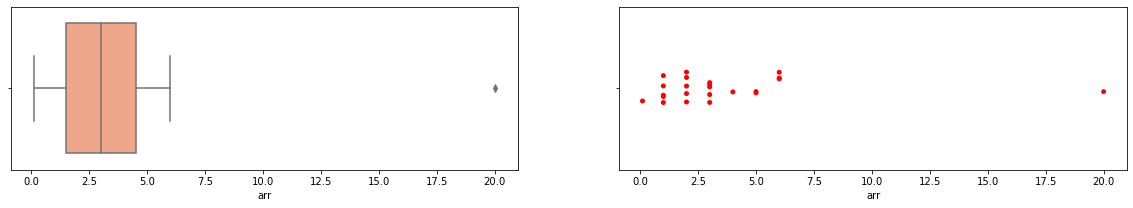

In [68]:
# 시각화

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(columns = ['arr'])
df['arr'] = arr

fig, ax = plt.subplots(1,2, figsize = (20,3))
sns.boxplot('arr', data = df, ax = ax[0], color = 'lightsalmon')
sns.stripplot('arr', data = df, ax = ax[1], color = 'red')

#### 표본분산과 불편분산의 차이를 사례를 들어 설명하기

In [69]:
import pandas as pd
import numpy as np

df = pd.read_csv('ch2_scores_em.csv')
df

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76
5,6,48,60
6,7,65,81
7,8,49,66
8,9,65,78
9,10,58,82


In [70]:
df_1 = df['english']
df_2 = df['mathematics']

<b>1. 표본분산</b>
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fd9lrbo%2FbtqDnwhttDQ%2FGpyLIK1ENoaLAR4rgEVuuK%2Fimg.png">

<b>2. 불편분산(비편향분산)</b>
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FRFAbv%2FbtqDmWAM3DP%2Fq2A9mSkKqBm6rZ17xPT4Fk%2Fimg.png">

참고:https://1992jhlee.tistory.com/19

In [71]:
# 표본분산 s^2 = 1/n* Σ(xi-xm)^2

print(df_1.var(ddof = 0))   # pandas var함수의 default는 불편분산임. 따라서, ddof = 0으로 표본분산을 계산하도록 함
print(df_2.var(ddof = 0))   

94.11560000000001
69.38559999999995


In [72]:
print((1/(len(df_1)))*((df_1 - df_1.mean())*(df_1 - df_1.mean())).sum())
print((1/(len(df_2)))*((df_2 - df_2.mean())*(df_2 - df_2.mean())).sum())

94.1156
69.38560000000001


In [73]:
print(np.var(df_1, ddof = 0))
print(np.var(df_2, ddof = 0))

94.11560000000001
69.38559999999995


In [74]:
# 불편분산: 1/(n-1)* Σ(xi-xm)^2 
## 표본 분산은 표본에서 계산된 분산
## 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아짐
## 즉, 표본 분산이 모집단 분산에 맞춰서 동일하게 보정 한 것을 비편향 분산(불편분산)이라 함

print(df_1.var(ddof = 1))   # pandas var함수의 default는 불편분산
print(df_2.var(ddof = 1))

96.03632653061226
70.80163265306118


In [75]:
print((1/(len(df_1)-1))*((df_1 - df_1.mean())*(df_1 - df_1.mean())).sum())
print((1/(len(df_2)-1))*((df_2 - df_2.mean())*(df_2 - df_2.mean())).sum())

96.03632653061223
70.80163265306122


In [76]:
print(np.var(df_1, ddof = 1))
print(np.var(df_2, ddof = 1))

96.03632653061226
70.80163265306118


### 데이터의 정규화

In [77]:
import pandas as pd
import numpy as np

df = pd.read_csv('ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [78]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [79]:
scores_df = pd.DataFrame({'score':scores},
                          index = pd.Index([i for i in 'ABCDEFGHIJ'], 
                                           name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


#### 표준화
- 데이터를 비교가 용이하도록 통일된 지표로 변환하는 것
- z = (rawdata - 평균)/ 표준편차 ~ N(0,1)

In [80]:
#표준화 변량, z-score 구하기

z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [81]:
# 표준화 변량의 평균 및 표준편차 구하기

np.mean(z), np.std(z)     

(-1.6653345369377347e-17, 0.9999999999999999)

In [82]:
# 표준화 변량의 평균 및 불편표준편차 구하기

np.mean(z), np.std(z, ddof = 1)

(-1.6653345369377347e-17, 1.0540925533894596)

#### 편찻값
- 평균이 50, 표준편차가 10이 되도록 정규화한 값
- z = 50 + 10*(rawdata - 평균)/표준편차 ~ N(50,10^2)

In [83]:
z2 = 50 + 10*z
z2

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [84]:
# 표준화 변량의 평균 및 표준편차 구하기

np.mean(z2), np.std(z2)     

(50.0, 10.000000000000002)

In [85]:
# 표준화 변량의 평균 및 불편표준편차 구하기

np.mean(z2), np.std(z2, ddof = 1)     

(50.0, 10.5409255338946)

### 1차원 데이터의 시각화

#### 도수분포표
- 분할된 구간과 데이터의 개수를 표로 정리한 것
- np.histogram(bins = n, range = (min,max)) 함수 사용


- 계급: 구간
- 계급값: 계급을 대표하는 값으로, 구간 내 중앙값을 말함
- 상대도수: 전체 도수에서 해당 계급의 데이터가 차지하는 비율
- 누적상대도수: 해당 계급까지의 상대도수의 합 
                np.cumsum 함수 사용

##### 영어성적을 가지고 도수분포표 작성하기

In [86]:
# step = 구간, freq = 데이터 개수

freq, step = np.histogram(df['english'], bins = 10, range = (0 ,100))
freq, step

(array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [87]:
# 도수분포표 데이터프레임화

freq_class = [f'{int(step[i])} ~ {int(step[i+1])}' for i in range(10)]

freq_dist_df = pd.DataFrame({'frequency': freq,},
                             index = pd.Index(freq_class, name = 'class'))
freq_dist_df

,frequency
class,
0 ~ 10,0
10 ~ 20,0
20 ~ 30,0
30 ~ 40,2
40 ~ 50,8
50 ~ 60,16
60 ~ 70,18
70 ~ 80,6
80 ~ 90,0


In [88]:
#계급값

class_value = []
for i in range(10):
    class_value.append(int((step[i+1]-step[i])/2+step[i]))

freq_dist_df['class_value'] = class_value
freq_dist_df

,frequency,class_value
class,,
0 ~ 10,0,5
10 ~ 20,0,15
20 ~ 30,0,25
30 ~ 40,2,35
40 ~ 50,8,45
50 ~ 60,16,55
60 ~ 70,18,65
70 ~ 80,6,75
80 ~ 90,0,85


In [89]:
# 상대도수

relative_freq = freq/freq.sum()
freq_dist_df['relative frequency'] = relative_freq
freq_dist_df

,frequency,class_value,relative frequency
class,,,
0 ~ 10,0,5,0.00
10 ~ 20,0,15,0.00
20 ~ 30,0,25,0.00
30 ~ 40,2,35,0.04
40 ~ 50,8,45,0.16
50 ~ 60,16,55,0.32
60 ~ 70,18,65,0.36
70 ~ 80,6,75,0.12
80 ~ 90,0,85,0.00


In [121]:
# 누적 상대도수

cumsum_relative_freq = np.cumsum(relative_freq)
freq_dist_df['cumulative relative freequency'] = cumsum_relative_freq
freq_dist_df

,frequency,class_value,relative frequency,cumulative relative freequency
class,,,,
0 ~ 10,0,5,0.00,0.00
10 ~ 20,0,15,0.00,0.00
20 ~ 30,0,25,0.00,0.00
30 ~ 40,2,35,0.04,0.04
40 ~ 50,8,45,0.16,0.20
50 ~ 60,16,55,0.32,0.52
60 ~ 70,18,65,0.36,0.88
70 ~ 80,6,75,0.12,1.00
80 ~ 90,0,85,0.00,1.00


In [122]:
#최종 데이터프레임

freq_dist_df = freq_dist_df[['class_value','frequency','relative frequency', 'cumulative relative freequency']]
freq_dist_df

,class_value,frequency,relative frequency,cumulative relative freequency
class,,,,
0 ~ 10,5,0,0.00,0.00
10 ~ 20,15,0,0.00,0.00
20 ~ 30,25,0,0.00,0.00
30 ~ 40,35,2,0.04,0.04
40 ~ 50,45,8,0.16,0.20
50 ~ 60,55,16,0.32,0.52
60 ~ 70,65,18,0.36,0.88
70 ~ 80,75,6,0.12,1.00
80 ~ 90,85,0,0.00,1.00


#### 히스토그램
- 도수분포표를 막대그래프로 나타낸 것

#####  영어성적을 가지고 히스토그램 만들기
i) 계급폭을 10으로 한 경우

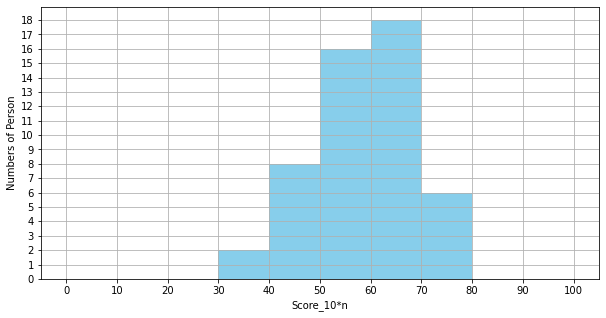

In [123]:
import matplotlib.pyplot as plt

# 그래프 사이즈 설정
fig = plt.figure(figsize = (10,5))

# subplot 개수 설정(행개수, 열개수, 위치)
ax = fig.add_subplot(111)

# 격자 생성
axes = plt.gca()
axes.xaxis.grid(True)
axes.yaxis.grid(True)

# 히스토그램 그리기
freq, step, _ = ax.hist(df['english'], bins = 10, range = (0,100), color = 'skyblue')

ax.set_xlabel('Score_10*n')
ax.set_ylabel('Numbers of Person')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,max(freq)+1))


plt.show()   #이상한 잡다구리한 설명 삭제됨

#####  영어성적을 가지고 히스토그램 만들기
i) 계급폭을 4으로 한 경우

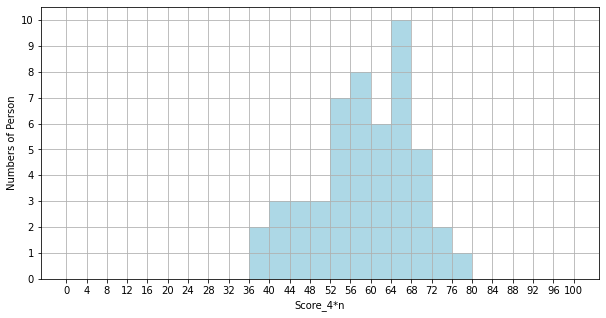

In [124]:
import matplotlib.pyplot as plt

#그래프 사이즈 설정
fig = plt.figure(figsize = (10,5))

# subplot 개수 설정(행개수, 열개수, 위치)
ax = fig.add_subplot(111)

# 격자 생성
axes = fig.gca()
axes.xaxis.grid(True)
axes.yaxis.grid(True)

# 히스토그램 그리기
freq, step, _ = ax.hist(df['english'], bins = 25, range = (0,100), color = 'lightblue')

ax.set_xlabel('Score_4*n')
ax.set_ylabel('Numbers of Person')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,max(freq)+1))

plt.show()

##### 누적 꺾은선 그래프 그리기

**Markers**
```
=============   ===============================
character       description
=============   ===============================
``'.'``         point marker
``','``         pixel marker
``'o'``         circle marker
``'v'``         triangle_down marker
``'^'``         triangle_up marker
``'<'``         triangle_left marker
``'>'``         triangle_right marker
``'1'``         tri_down marker
``'2'``         tri_up marker
``'3'``         tri_left marker
``'4'``         tri_right marker
``'8'``         octagon marker
``'s'``         square marker
``'p'``         pentagon marker
``'P'``         plus (filled) marker
``'*'``         star marker
``'h'``         hexagon1 marker
``'H'``         hexagon2 marker
``'+'``         plus marker
``'x'``         x marker
``'X'``         x (filled) marker
``'D'``         diamond marker
``'d'``         thin_diamond marker
``'|'``         vline marker
``'_'``         hline marker
=============   ===============================
```

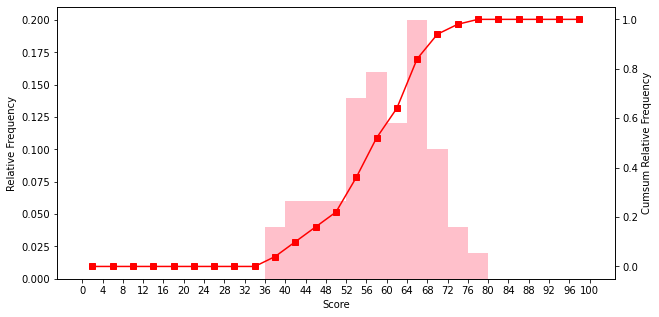

In [125]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(111)
# ax2: y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램 그리기
## weights: 도수에 가중치를 주는 것
## 1로 구성된 원소 배열을 df['english']요소의 개수만큼 만들어주고 가중치로 부여
weights = np.ones_like(df['english'])/len(df)
rel_freq, step, _ = ax1.hist(df['english'], bins = 25, range = (0,100), weights = weights, color = 'pink')

# 누적 상대도수의 꺾은선그래프 그리기
## x축값: 계급값
class_value = [ (i+(i+4))//2 for i in range(0, 100, 4)]
## y축값: 누적상대도수 
cum_rel_freq = np.cumsum(rel_freq)

ax2.plot(class_value, cum_rel_freq, marker = 's', color = 'red')


ax1.set_xlabel('Score')
ax1.set_ylabel('Relative Frequency')
ax1.set_xticks(np.linspace(0,100,25+1))
ax2.set_ylabel('Cumsum Relative Frequency')

plt.show()

##### Box plot 그리기
- 데이터의 산포도를 나타내는 plot
- 사분위범위와 이상값
    * IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
    * lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
    * upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
    * 이상치: lower whisker, upper whisker를 벗어나는 값



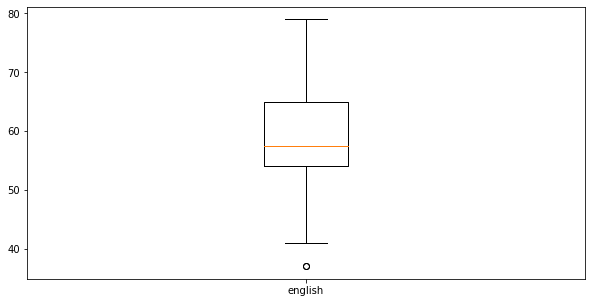

In [126]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot(111)
ax.boxplot(df['english'], labels = ['english'])

plt.show()

## 2차원 데이터

### 두 데이터 사이의 관계를 나타내는 지표

In [127]:
import numpy as np
import pandas as pd

df = pd.read_csv('ch2_scores_em.csv')

en_scores = np.array(df['english'][:10])
ma_scores = np.array(df['mathematics'][:10])
scores_df = pd.DataFrame({'english': en_scores,
                          'math': ma_scores},
                          index = pd.Index([i for i in 'ABCDEFGHIJ'], name = 'student'))
scores_df

,english,math
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


#### (미리)산점도

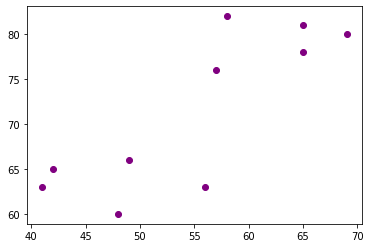

In [128]:
plt.scatter(scores_df['english'], scores_df['math'], color = 'purple')

#### 공분산
- Sxy = 1/n* Σ(Xi-Xm)*(Yi-Ym)
- np.cov(x, y, ddof = 0) 함수
    - 반환값은 행렬
    - 공분산: [0,1], [1,0]
    - x분산:[0,0], y분산:[1,1]

In [129]:
# 공분산 구하기
# 방법1

cov_map = np.cov(scores_df['english'], scores_df['math'], ddof = 0).round(2)


print(cov_map)
print('\n')
print(f'영어 성적의 표본분산: {cov_map[0,0]}')
print(f'수학 성적의 표본분산: {cov_map[1,1]}')
print(f'영어성적과 수학성적의 공분산: {cov_map[0,1]}')

[[86.   62.8 ]
 [62.8  68.44]]


영어 성적의 표본분산: 86.0
수학 성적의 표본분산: 68.44
영어성적과 수학성적의 공분산: 62.8


In [130]:
# 분산을 따로 구해보기

print(np.var(scores_df['english']))
print(np.var(scores_df['math']))

86.0
68.44000000000001


In [131]:
# 공분산 구하기
# 방법2

cov_map = scores_df.cov(ddof = 0)
display(cov_map)

print('\n')
print(f'영어 성적의 표본분산: {cov_map.iloc[0,0].round(1)}')
print(f'수학 성적의 표본분산: {cov_map.iloc[1,1].round(1)}')
print(f'영어성적과 수학성적의 공분산: {cov_map.iloc[0,1].round(1)}')

,english,math
english,86.0,62.80
math,62.8,68.44




영어 성적의 표본분산: 86.0
수학 성적의 표본분산: 68.4
영어성적과 수학성적의 공분산: 62.8


#### 상관계수
- rxy = Sxy / (Sx*Sy)
- -1 < rxy < 1
- np.corrcoef(x,y) 함수, corr() 함수
    - 상관계수: [0,1], [1,0]

In [132]:
# 방법1: Sxy/(Sx*Sy) 직접 구하기

(np.cov(scores_df['english'], scores_df['math'], ddof = 0)[0,1]/(np.std(scores_df['english'])*np.std(scores_df['math']))).round(2)

0.820

In [133]:
# 방법2: np.corrcoef 함수 사용

np.corrcoef(scores_df['english'], scores_df['math']).round(2)

array([[1.  , 0.82],
       [0.82, 1.  ]])

In [134]:
# 방법3: corr() 함수 사용

scores_df.corr().round(2)

,english,math
english,1.00,0.82
math,0.82,1.00


### 2차원 데이터 시각화

In [135]:
df = pd.read_csv('ch2_scores_em.csv')
df_english = np.array(df['english'])
df_math = np.array(df['mathematics'])

#### 산점도

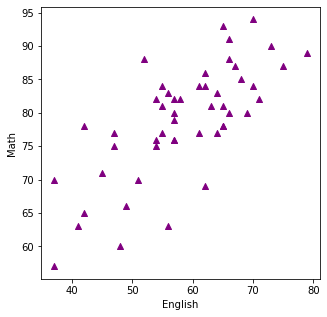

In [136]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))

ax = fig.add_subplot(111)

#산점도 그리기
ax.scatter(df_english, df_math, marker = '^', color = 'purple')

ax.set_xlabel('English')
ax.set_ylabel('Math')

plt.show()

#### 회귀직선
- y  = B0 + B1*x
- np.polyfit함수, np.poly1d함수

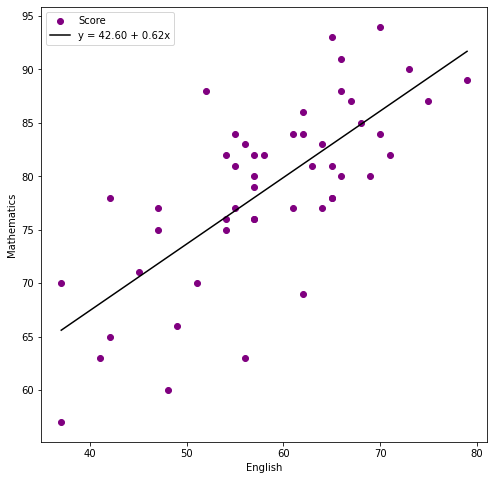

In [137]:
# B0, B1 계수 구하기
poly_fit = np.polyfit(df_english, df_math, 1)

# B0 + B1*x 반환하는 함수 작성
poly_1d = np.poly1d(poly_fit)

# 직선 그리기
## x축
xs = np.linspace(df_english.min(), df_english.max())
## y축
ys = poly_1d(xs)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

# 산점도 그리기
ax.scatter(df_english, df_math, marker = "o", label = "Score", color = "purple")
# 회귀직선 그리기
ax.plot(xs, ys, color = "black", label = f'y = {poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')

ax.set_xlabel('English')
ax.set_ylabel('Mathematics')

# 범례표시
ax.legend(loc = "upper left")

plt.show()

#### polyfit 함수 사용법
- poly(x,y,차수) 형태

In [138]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

# 1차원 회귀식 계수 생성: Y = B0 + B1X
poly = np.polyfit(x,y,1)
print(poly)

b0 = poly[1]
b1 = poly[0]

# 회귀식 작성
y = f'y = {b0:.2f} + {b1:.2f}*x'
print(y)

[ 3.314 -3.6  ]
y = -3.60 + 3.31*x


##### 1차원 회귀식
np.polyfit(x,y,<span style = 'color:red'>1</span>)

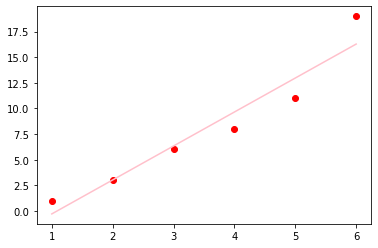

In [139]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

# 1차원 회귀계수 구하기
## 회귀식: Y = B0 + B1X
poly = np.polyfit(x,y,1)


# 회귀계수로 y예측값 만들기
y_pred = np.array(x) * poly[0] + poly[1]


#시각화
plt.plot(x,y_pred, color = 'pink')   # 직선은 예측값으로
plt.scatter(x,y,color = 'red')    # 산점도는 실제값으로 
plt.show()

##### 2차원 회귀식
np.polyfit(x,y,<span style = 'color:red'>2</span>)

[ 0.536 -0.436  1.4  ]


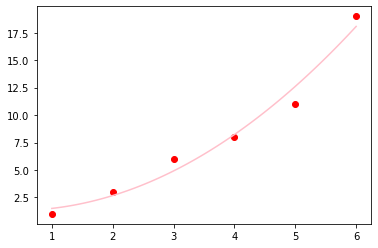

In [140]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

# 2차원 회귀계수 만들기
## 회귀식: Y = B0 + B1X + B2X^2
poly = np.polyfit(x,y,2)
print(poly)   # [B2, B1, B0]


# 시각화
## 곡선을 완만하게 그리기 위해 X값을 세분화
x_line = np.linspace(1,6,100)   
y_pred = x_line**2*poly[0] + x_line*poly[1] + poly[2]


plt.plot(x_line,y_pred, color = 'pink')   # 예측값은 곡선으로
plt.scatter(x, y, color = 'red')       #실제값은 산점도로
plt.show()

##### 5차원 회귀식
np.polyfit(x,y,<span style = 'color:red'>5</span>)

[ -0.017   0.417  -3.417  12.083 -16.067   8.   ]


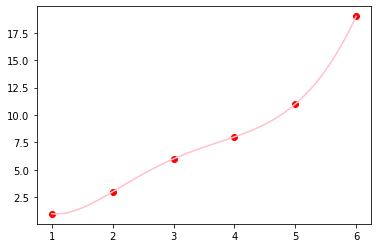

In [141]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

# 5차원 회귀계수 만들기: Y = B0 + B1X + B2X^2 + B3X^3 + B4X^4 + B5X^5
poly = np.polyfit(x,y,5)
print(poly)   # [B5, B4, B3, B2, B1, B0]


#시각화

## 곡선을 완만하게 그리기 위해 X값을 세분화
x_line = np.linspace(1,6,100)
y_pred = np.zeros_like(x_line)

## 배열은 전체값을 알아서 계산해줌. 따로 요소값마다 돌리는 다중 for문 안돌려도됨
for i in range(6):
    y_pred += x_line**(5-i)*poly[i]  

plt.plot(x_line, y_pred, color = 'pink')
plt.scatter(x,y, color = 'red')

- <b> <span style = 'color:red'> 차원이 높아질 수록, 예측률을 높아지지만 과적합 문제가 생김.</span></b>
- <b> <span style = 'color:red'> 일반화할 수 없어짐.</span></b>

#### 히트맵

In [142]:
df_english.min(), df_english.max()

(37, 79)

In [143]:
df_math.min(), df_math.max()

(57, 94)

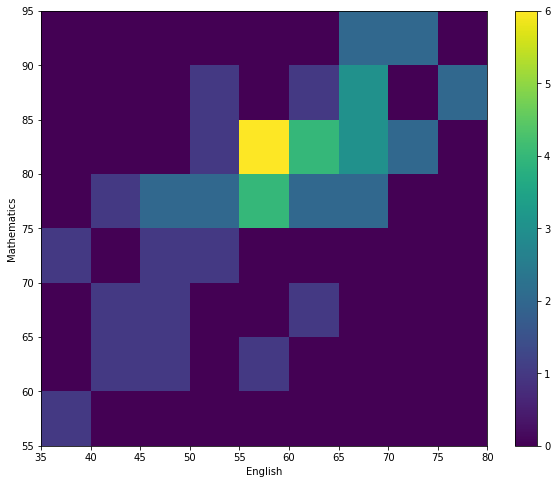

In [144]:
fig = plt.figure(figsize = (10,8))

ax = fig.add_subplot(111)


## 각 배열의 최소, 최댓값과 가까운 값으로 구간을 정해줌
c = ax.hist2d(df_english, df_math,
              bins = [9,8], range = [(35,80), (55,95)])    

ax.set_xlabel('English')
ax.set_ylabel('Mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러바 표시
fig.colorbar(c[3], ax = ax)

plt.show()

### 과제

#### 일차원 데이터를 생성
해서  다음을 수행
- 도수분포표를 만들고 히스토그램으로 시각화하세요
- 상대도수 및 누적상대도수를 도수분포표에 추가하고 히스토그램과 누적상대도수를 시각화하세요

,freq
petal length,
0 ~ 1 cm,0
1 ~ 2 cm,50
2 ~ 3 cm,0
3 ~ 4 cm,11
4 ~ 5 cm,43
5 ~ 6 cm,35
6 ~ 7 cm,11
7 ~ 8 cm,0


,freq,relative freq,cumulative relative freq
petal length,,,
0 ~ 1 cm,0,0.000000,0.00
1 ~ 2 cm,50,0.333333,0.33
2 ~ 3 cm,0,0.000000,0.33
3 ~ 4 cm,11,0.073333,0.41
4 ~ 5 cm,43,0.286667,0.69
5 ~ 6 cm,35,0.233333,0.93
6 ~ 7 cm,11,0.073333,1.00
7 ~ 8 cm,0,0.000000,1.00


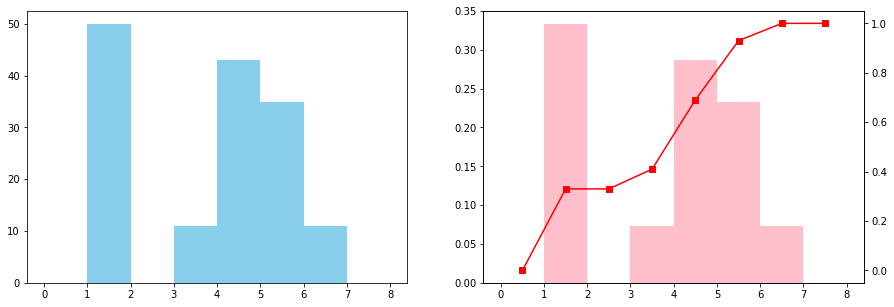

In [145]:
from sklearn.datasets import load_iris # scikit-learn의 샘플 데이터 로드를 위해 import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 꽃잎 길이 데이터 추출
iris = load_iris() 
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
petal_length = df[['petal length (cm)']]
# display(petal_length)



# 도수분포표 만들기
## 계급 설정
# print(petal_length.describe().round(2))  # 꽃잎길이 최솟값, 최댓값 확인
freq, step = np.histogram(petal_length, bins = 8, range = (0 ,8))
step = [f'{i} ~ {i+1} cm' for i in range(0,8)]
# print(freq, step)
petal_len_df = pd.DataFrame({'freq': freq }, pd.Index( step , name = 'petal length'))
display(petal_len_df)


# 히스토그램 그리기
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(petal_length, bins = 8, range = (0,8), color = 'skyblue')



# 상대도수 만들기
petal_len_df['relative freq'] = petal_len_df['freq']/petal_len_df['freq'].sum()

# 누적상대도수 만들기
petal_len_df['cumulative relative freq'] = petal_len_df['relative freq'].cumsum().round(2)
display(petal_len_df)


# 히스토그램과 누적상대도수 선그래프 그리기
ax2 = fig.add_subplot(1,2,2)
ax3 = ax2.twinx()

## 히스토그램
weights = np.ones_like(petal_length)/len(petal_length)
ax2.hist(petal_length, bins = 8, range = (0,8), weights = weights, color = 'pink')

### x축값: 계급값
class_value = [ (i+(i+1))/2 for i in range(0, 8)]
### y축값: 누적상대도수 
cumsum = petal_len_df['cumulative relative freq']

## 꺾은선 그래프
ax3.plot(class_value, cumsum, marker = 's', color = 'red')


plt.show()


#### 이차원 데이터 생성
해(1000개) 다음을 수행하세요 
- 공분산 및 상관계수를 구하세요.
- 이차원 데이터를 산점도, 히트맵으로 시각화한 후 인사이트를 기술하세요. 

x,y의 공분산: 215022.65
x,y의 상관계수: 0.81


B1 계수: 2.58
B0 계수: 309.89


회귀식: y = 309.89 +  2.58x




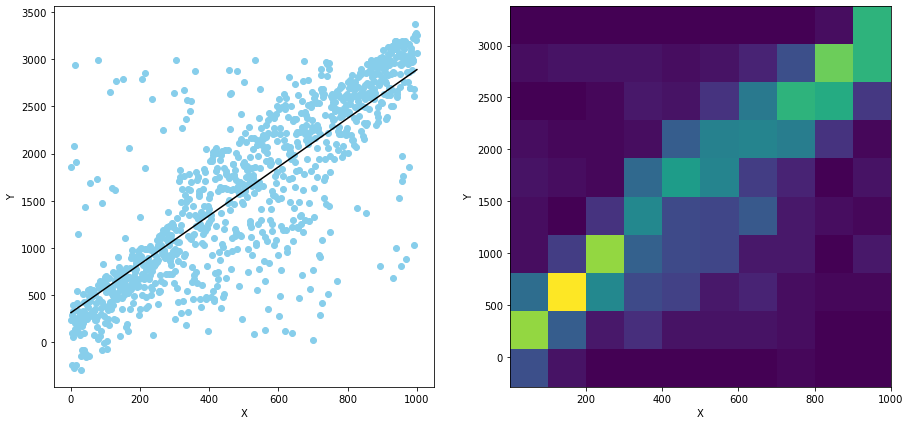

In [146]:
# 랜덤 데이터 생성
# 방법1 ============================================================
import numpy as np

x = np.arange(1,1001)
y = np.random.randint(1,3000,1000)

# 데이터의 경향성 만들기 (y = 3x에 가깝게..)
for i in np.random.randint(0,300,300):
    y[i]= x[i] * 3 - np.random.randint(1,400,1)    
for i in np.random.randint(0,300,300):
    y[i]= x[i] * 3 + np.random.randint(1,400,1)    
for i in np.random.randint(300,750,300):
    y[i]= x[i] * 3 - np.random.randint(1,800,1)   
for i in np.random.randint(300,750,300):
    y[i]= x[i] * 3 + np.random.randint(1,800,1)
for i in np.random.randint(750,1000,300):
    y[i]= x[i] * 3 - np.random.randint(1,400,1)
for i in np.random.randint(750,1000,300):
    y[i]= x[i] * 3 + np.random.randint(1,400,1)

    
## 방법2 ============================================================

# x = np.arange(1,1001)
# y = x.copy()
# for i in range(1000):
#     if i<250 or i>750:
#         x_move = np.random.uniform(2.5,3.5)
#         y_move = np.random.randint(0,500)
#     else: 
#         x_move = np.random.uniform(2.2,3.8)
#         y_move = np.random.randint(0,1000)
#     y[i] = x[i]*x_move + y_move


    
    
# 공분산, 상관계수 구하기
cov_xy = np.cov(x,y, ddof = 0)[0,1].round(2)
r_xy = np.corrcoef(x, y)[0,1].round(2)

print(f'x,y의 공분산: {cov_xy}')
print(f'x,y의 상관계수: {r_xy}')
print('\n')



# 산점도 그리기
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(x, y, color = 'skyblue')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')



# 회귀선 추가
## B0, B1 계수 구하기
poly_fit = np.polyfit(x, y, 1)
print(f'B1 계수: {poly_fit[0]:.2f}')
print(f'B0 계수: {poly_fit[1]:.2f}')
print('\n')
print(f'회귀식: y = {poly_fit[1]:.2f} +  {poly_fit[0]:.2f}x')
print('\n')

## B0 + B1*x 반환하는 함수 작성
poly_1d = np.poly1d(poly_fit)

## x축
xs = np.linspace(x.min(), x.max())
## y축
ys = poly_1d(xs)
ax1.plot(xs, ys, color = 'black' )




# 히트맵 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.hist2d(x, y)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')



plt.show()

### 앤스컴의 예

In [147]:
# npy 형식으로 저장된 Numpy array 불러오기

import numpy as np
anscombe_data = np.load('ch3_anscombe.npy')

print(anscombe_data.shape)  # 11행 2열이 4개
print(anscombe_data)

(4, 11, 2)
[[[10.    8.04]
  [ 8.    6.95]
  [13.    7.58]
  [ 9.    8.81]
  [11.    8.33]
  [14.    9.96]
  [ 6.    7.24]
  [ 4.    4.26]
  [12.   10.84]
  [ 7.    4.82]
  [ 5.    5.68]]

 [[10.    9.14]
  [ 8.    8.14]
  [13.    8.74]
  [ 9.    8.77]
  [11.    9.26]
  [14.    8.1 ]
  [ 6.    6.13]
  [ 4.    3.1 ]
  [12.    9.13]
  [ 7.    7.26]
  [ 5.    4.74]]

 [[10.    7.46]
  [ 8.    6.77]
  [13.   12.74]
  [ 9.    7.11]
  [11.    7.81]
  [14.    8.84]
  [ 6.    6.08]
  [ 4.    5.39]
  [12.    8.15]
  [ 7.    6.42]
  [ 5.    5.73]]

 [[ 8.    6.58]
  [ 8.    5.76]
  [ 8.    7.71]
  [ 8.    8.84]
  [ 8.    8.47]
  [ 8.    7.04]
  [ 8.    5.25]
  [19.   12.5 ]
  [ 8.    5.56]
  [ 8.    7.91]
  [ 8.    6.89]]]


In [148]:
import pandas as pd

stats_df = pd.DataFrame(index = ['X_mean', 'X_variance', 'Y_mean','Y_variance', 'X&Y_correlation','X&Y_regression line'])

for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX): .2f}',
                              f'{np.var(dataX): .2f}',
                              f'{np.mean(dataY): .2f}',
                              f'{np.var(dataY): .2f}',
                              f'{np.corrcoef(dataX,dataY)[0,1]: .2f}',
                              f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']
    
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


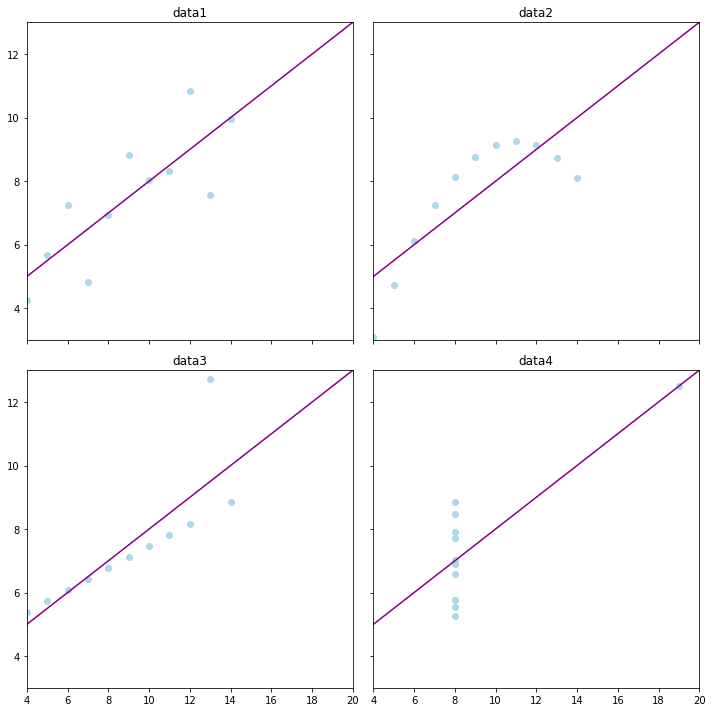

In [149]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), 
                         sharex = True, sharey = True)

xs = np.linspace(0, 30, 100)

for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    ax = axes[i // 2, i % 2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1], color = 'lightblue')
    ax.plot(xs, ys, color = 'purple')
    
plt.tight_layout()
plt.show()

## 추측통계의 기본

### 모집단과 표본

- 모집단: 추측하고 싶은 관측 대상 전체
- 표본: 추측에 사용하는 관측 대상의 일부분
- 표본추출: 모집단에서 표본을 골라내는 일
- 모수: 모집단의 평균, 분산, 상관계수 등
- 표본통계량: 표본을 바탕으로 계산한 평균이나 분산, 상관계수 등 
- 추정량: 표본통계량으로 모수를 추측할 때 표본통계량



- 무작위추출: 임의로 표본을 추출하는 방법  
    - 복원추출: 여러차례 동일한 표본 선택 가능 -> <b>np.random.choice(list, n)</b>
    - 비복원추출: 동일한 표본은 한 번만 선택 가능 -> <b>np.random.choice(list, n, replace = False)</b>
    - 반복 무작위추출 시, 통계량이 달라지는 것 방지 -> np.random.seed(0)
        - 위치에 따라서 고정되는 값이 달라짐

In [150]:
import numpy as np

for i in range(5):
    print(np.random.choice([1,2,3,4,5],2))

[4 1]
[5 3]
[4 1]
[1 4]
[5 4]


In [151]:
np.random.seed(0)

for i in range(5):
    print(np.random.choice([1,2,3,4,5],2))

[5 1]
[4 4]
[4 2]
[4 3]
[5 1]


In [152]:
for i in range(5):
    np.random.seed(0)
    print(np.random.choice([1,2,3,4,5],2))

[5 1]
[5 1]
[5 1]
[5 1]
[5 1]


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ch4_scores400.csv')
df

,score
0,76
1,55
2,80
3,80
4,74
...,...
395,77
396,60
397,83
398,80


In [154]:
np.random.seed(0)

scores = np.array(df['score'])
sample = np.random.choice(scores, 20)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [155]:
sample.mean()

70.400

In [156]:
scores.mean()

69.530

In [157]:
scores = np.array(df['score'])
sample = np.random.choice(scores, 20)
sample

array([56, 55, 79, 91, 86, 79, 83, 55, 85, 76, 81, 57, 77, 99, 61, 57, 81,
       73, 59, 59], dtype=int64)

### 확률모형
- 확률변수: 취하는 값과 그 값이 나올 확률이 결정되어 있는 것
    - 사건이 서로 배반이라면, 그 중에 적어도 하나 일어나는 사건은 각 사건의 확률의 합과 같음
- 확률분포: 확률변수가 어떻게 움직이는지를 나타냄
    - 각 요소의 확률을 지정해주는 함수 np.random.choice(변수, p = 확률정의 변수)

In [158]:
# 주사위 눈과 각 요소가 나올 확률 지정

dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [159]:
# 100개 랜덤추출

num_trial = 100
sample = np.random.choice(dice, num_trial, p = prob)
sample

array([2, 5, 3, 6, 5, 4, 3, 6, 4, 5, 1, 5, 5, 5, 6, 5, 4, 4, 5, 2, 5, 5,
       3, 2, 4, 4, 5, 4, 6, 2, 3, 3, 5, 3, 4, 3, 3, 2, 5, 2, 3, 4, 6, 2,
       6, 2, 6, 4, 6, 5, 6, 1, 3, 2, 4, 2, 4, 4, 2, 5, 5, 3, 5, 2, 5, 6,
       4, 5, 2, 6, 4, 3, 5, 1, 6, 1, 5, 3, 6, 6, 3, 5, 5, 5, 3, 6, 4, 6,
       5, 4, 6, 4, 6, 5, 6, 5, 6, 5, 6, 5])

In [160]:
# 각 계급별 도수 및 상대도수 측정
freq, _ = np.histogram(sample, bins = 6, range = (1,7))

pd.DataFrame({'freq': freq, 'relative freq': freq/num_trial}, 
              pd.Index(list(range(1,7)), name = 'dice'))

,freq,relative freq
dice,,
1,4,0.04
2,13,0.13
3,15,0.15
4,18,0.18
5,29,0.29
6,21,0.21


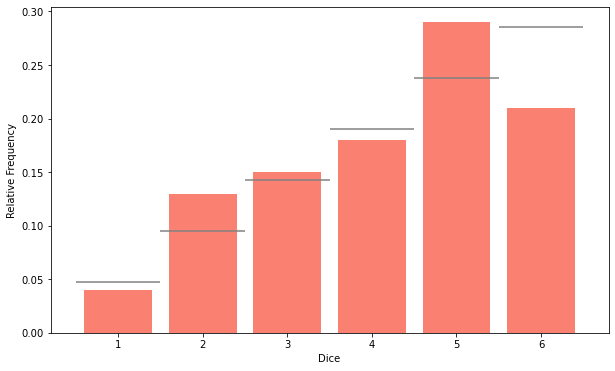

In [161]:
# 히스토그램 그리기

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

# 히스토그램 그리기
ax.hist(sample, bins = 6, range = (1,7), density = True, rwidth = 0.8, color = 'salmon')
# ax.hist(sample, bins = 6, range = (1,7), weights = np.ones_like(sample)/len(sample), rwidth = 0.8)

# 실제 확률분포 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), color = 'gray')


# 막대그래프의 [1.5,2.5,...,6.5]에 눈금표시하기
ax.set_xticks(np.linspace(1.5,6.5,6))  # 눈금 위치
ax.set_xticklabels(np.arange(1,7)) # 눈금 내용
ax.set_xlabel('Dice')
ax.set_ylabel('Relative Frequency')

plt.show()

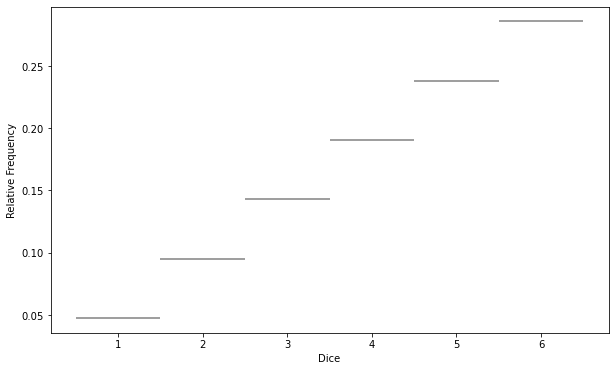

In [162]:
# 10000개 랜덤추출

num_trial2 = 10000
sample2 = np.random.choice(list(range(1,7)), num_trial2, p = prob)


# 시각화
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

# 히스토그램 그리기
ax.hlines(prob, np.arange(1,7), np.arange(2,8), color = 'gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('Dice')
ax.set_ylabel('Relative Frequency')
plt.show()

시행횟수를 늘릴 수록 상대도수가 확률분포에 수렴해감

### 추측통계의 확률
- 무작위추출은 확률분포를 따르는 확률변수의 시행임
- 히스토그램의 x 구간(점수)을 세분화하고 y인 상대도수(해당 점수를 얻은 사람 수)를 y축으로 두면, 이 히스토그램을 모집단의 확률분포로 간주할 수 있음 

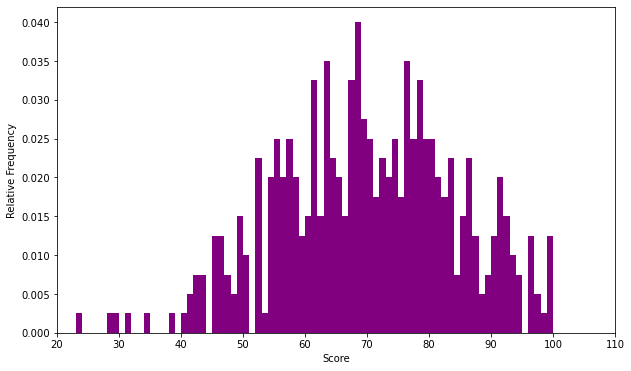

In [163]:
# 400개의 성적을 가지고 히스토그램(확률분포) 만들기

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

# 계급폭을 1로 하는 히스토그램 그리기
ax.hist(scores, bins = 100, range = (0,100), density = True, color = 'purple')

# x, y축 구간 제한
ax.set_xlim(20,110)
ax.set_ylim(0,0.042)

ax.set_xlabel('Score')
ax.set_ylabel('Relative Frequency')

plt.show()

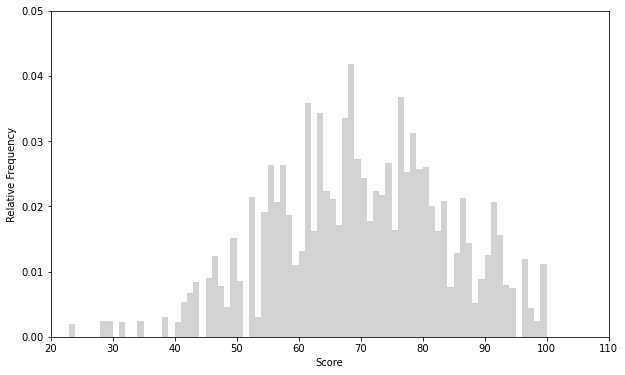

In [164]:
# 점수 표본의 크기를 늘리기

sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.hist(sample, bins = 100, range = (0,100), density = True, color = 'lightgray')

ax.set_xlim(20,110)
ax.set_ylim(0,0.05)
ax.set_xlabel('Score')
ax.set_ylabel('Relative Frequency')

plt.show()

표본수를 늘려도 히스토그램의 실제 점수 분포에 매우 가까운 형태로 나타남

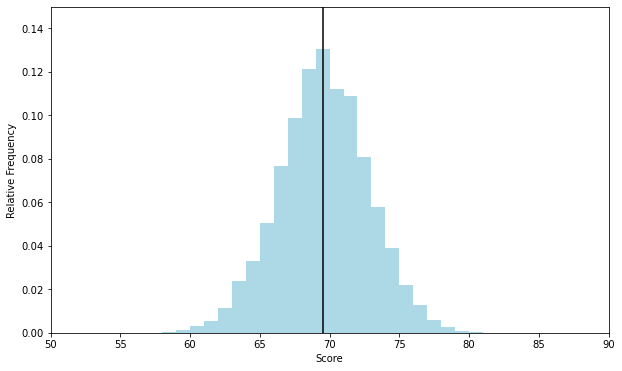

In [165]:
# 무작위추출로 표본크기가 20인 표본을 추출하여 표본평균을 계산

sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins = 100, range = (0,100), density = True, color = 'lightblue')

# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores),0,1, color ='black')

ax.set_xlim(50,90)
ax.set_ylim(0,0.15)
ax.set_xlabel('Score')
ax.set_ylabel('Relative Frequency')

plt.show()

- 표본평균은 산포도 그자체로, 모평균을 중심으로 분포하는 것을 알 수 있음
- 무작위추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 됨

### 과제

#### 적절한 데이터를 생성하고 polyfit을 이용
하여 2,3차 방정식을 만든 후 산점도 및 회귀식을 시각화하여 의미를 해석하기

<img src = "https://t1.daumcdn.net/cfile/blog/99FBA44C5AD897502E" width = 300>

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


       petal length (cm)  petal width (cm)
count         150.000000        150.000000
mean            3.758000          1.199333
std             1.765298          0.762238
min             1.000000          0.100000
25%             1.600000          0.300000
50%             4.350000          1.300000
75%             5.100000          1.800000
max             6.900000          2.500000
2차 회귀 방정식 Y = B0 + B1x + B2x^2: 

Y = 0.68+3.45X+-0.53X^2
3차 회귀 방정식 Y = B0 + B1x + B2x^2 + B3x^3: 

Y = 1.10+1.15X+1.71X^2 + -0.58X^3


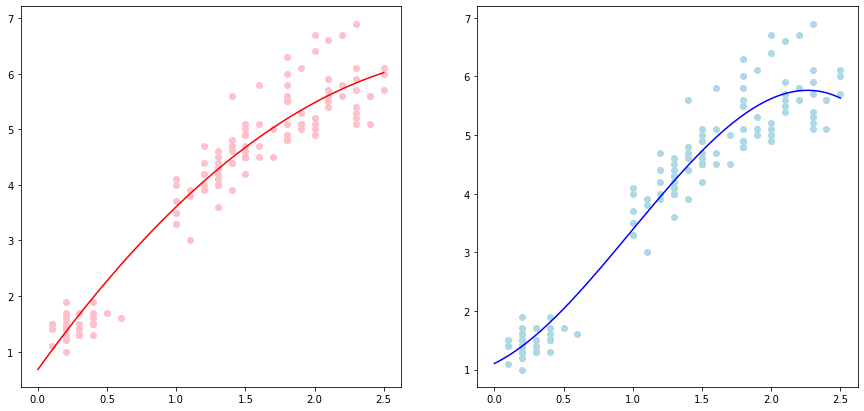

In [166]:
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 꽃잎 길이, 폭 데이터 추출
iris = load_iris() 
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
display(df)
petal = df[['petal length (cm)', 'petal width (cm)']]
# display(petal)
print(petal.describe())


print('=======================================================')
# 2차원 회귀방정식 만들기
## 회귀계수 생성
poly2d = np.polyfit(petal.iloc[:,1], petal.iloc[:,0], 2)

B0, B1, B2 = poly2d[2], poly2d[1], poly2d[0]

## 회귀방정식
print(f'2차 회귀 방정식 Y = B0 + B1x + B2x^2: \n')
print(f'Y = {B0:.2f}+{B1:.2f}X+{B2:.2f}X^2')


# 시각화
fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(1,2,1)

## 산점도 그리기
ax1.scatter(petal.iloc[:,1], petal.iloc[:,0], color = 'pink')

## 회귀선 그리기
x = np.linspace(0,2.5,100)
y_pred = B0 + B1 * x + B2 * x**2
ax1.plot(x, y_pred, color = 'red')


print('=======================================================')
# 3차원 회귀방정식 만들기
## 회귀계수 생성
poly3d = np.polyfit(petal.iloc[:,1],petal.iloc[:,0], 3)

B0, B1, B2, B3 = poly3d[3], poly3d[2], poly3d[1], poly3d[0]

## 회귀방정식 생성
print(f'3차 회귀 방정식 Y = B0 + B1x + B2x^2 + B3x^3: \n')
print(f'Y = {B0:.2f}+{B1:.2f}X+{B2:.2f}X^2 + {B3:.2f}X^3')

# 시각화
ax2 = fig.add_subplot(1,2,2)

## 산점도 그리기
ax2.scatter(petal.iloc[:,1], petal.iloc[:,0], color = 'lightblue')

## 회귀선 그리기
x = np.linspace(0,2.5,100)
y_pred = B0 + B1 * x + B2 * x**2 + B3 * x**3
ax2.plot(x, y_pred, color = 'blue')

print('=======================================================')

#### 표본평균은 모평균을 중심으로 분포
어떤 모집단에서 표본을 랜덤하게 추출하여 표본평균을 구하면 그 표본평균은 모평균을 중심으로 분포한다 라는 주장을 사례를 만들어서 설득력있게 설명하기

[51.56666666666667, 62.43333333333333, 61.166666666666664, 57.03333333333333, 57.8, 61.96666666666667, 55.86666666666667, 62.13333333333333, 61.06666666666667, 56.13333333333333, 60.0, 51.63333333333333, 49.9, 57.0, 63.36666666666667, 61.8, 52.86666666666667, 58.93333333333333, 55.5, 60.6]


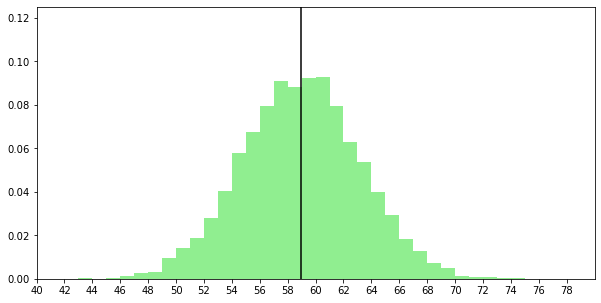

In [167]:
np.random.seed(0)

scores = np.random.randint(20,100, 400)

f'랜덤 생성된 데이터의 평균(모평균):{scores.mean()}'

# 10000개의 표본의 평균 생성
scores_n = [np.random.choice(scores, 30).mean() for _ in range(10000)]
print(scores_n[:20])
# 시각화
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

## 히스토그램
ax.hist(scores_n, bins = 80, range = (20,100), density = True, color = 'lightgreen')

## 모평균 수직선
ax.vlines(scores.mean(), 0,1, color = 'black')

ax.set_xlim(40,80)
ax.set_ylim(0,0.125)
ax.set_xticks(np.arange(40,80,2))

plt.show()

# 표본평균은 산포도 그자체로, 모평균을 중심으로 분포하는 것을 알 수 있음
# 무작위추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 됨

## 이산형 확률변수

### 1차원 이산형 확률변수

#### 확률질량함수

In [168]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3

'%.3f'

In [169]:
# 주사위 눈에 따라 확률이 달라지는 확률변수 만들기

# X 지정
x_set = np.array([1,2,3,4,5,6])

# P(X) 지정
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

prob = np.array([f(x_k) for x_k in x_set])
prob2 = np.array([f(7-x_k) for x_k in x_set])
prob, prob2

(array([0.048, 0.095, 0.143, 0.19 , 0.238, 0.286]),
 array([0.286, 0.238, 0.19 , 0.143, 0.095, 0.048]))

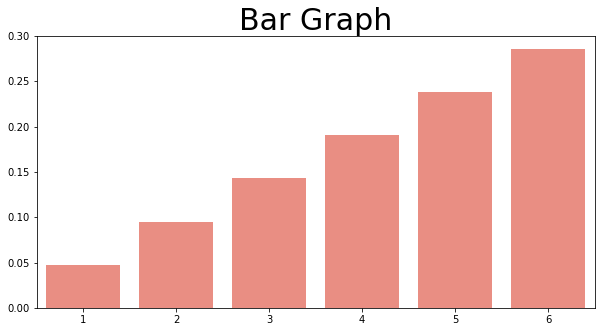

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (10,5))
sns.barplot(x_set, prob, color = 'salmon')
plt.title('Bar Graph', fontsize = 30)

plt.show()

In [171]:
# 누적분포함수 만들기(확률변수-> 누적확률)

x_set = np.array([1,2,3,4,5,6])

def F(x):
    return np.sum(f(x_k) for x_k in x_set if x_k <= x)


cum = []
for i in range(1,7):
    cum.append(F(i))
cum

[0.048, 0.143, 0.286, 0.476, 0.714, 1.000]

In [172]:
# 확률변수의 변환
## 확률변수 x에 2를 곱하고 3을 더한 2x + 3 역시 확률변수가 됨

y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])

## 딕셔너리형태로 변형
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

#### 1차원 이산형 확률변수의 지표

이산형 확률변수의 경우
- 기댓값 = 확률변수의 평균
    1. 확률변수를 몇 번이나 무제한으로 시행하여 얻어진 실현값의 평균임
    2. 확률변수가 취할 수 있는 값과 그 확률의 곱의 총합
    

<b>1. 확률값이 일어날 확률이 <span style = "color :red"> 동일한</span> 경우</b>

In [173]:
# 확률변수를 공식으로 기댓값 계산하기

np.sum([x_k * 1/len(x_set) for x_k in x_set])

3.500

In [174]:
# 무제한으로 표본을 뽑고 평균 계산해보기

sample = np.random.choice(x_set, int(1e6))
print(f'표본을 백만개 뽑았을 때: {sample.mean():.4f}')

sample = np.random.choice(x_set, int(1e7))
print(f'표본을 천만개 뽑았을 때: {sample.mean():.4f}')

sample = np.random.choice(x_set, int(1e8))
print(f'표본을 일억개 뽑았을 때: {sample.mean():.4f}')


표본을 백만개 뽑았을 때: 3.4959
표본을 천만개 뽑았을 때: 3.4992
표본을 일억개 뽑았을 때: 3.5002


<b>2. 확률값이 일어날 확률이 <span style = "color :red"> 다른</span> 경우</b>

In [175]:
# 공식으로 기댓값 계산하기

# X값에 대해 확률을 오름차순 지정
ex1 = np.sum([x_k * f(x_k) for x_k in x_set])

# X값에 대해 확률을 내림차순 지정
ex2 = np.sum([x_k * f(7-x_k) for x_k in x_set])
ex1, ex2

(4.333, 2.667)

In [176]:
# 무제한으로 표본을 뽑고 평균 계산해보기

## X값 올라갈 수록 확률 올라감
sample = np.random.choice(x_set, int(1e6), p = prob)
print(f'표본을 백만개 뽑았을 때: {sample.mean():.4f}')

sample = np.random.choice(x_set, int(1e7), p = prob)
print(f'표본을 천만개 뽑았을 때: {sample.mean():.4f}')

sample = np.random.choice(x_set, int(1e8), p = prob)
print(f'표본을 일억개 뽑았을 때: {sample.mean():.4f}')

print('\n\n')


## X값 올라갈 수록 확률 내려감
sample = np.random.choice(x_set, int(1e6), p = prob2)
print(f'표본을 백만개 뽑았을 때: {sample.mean():.4f}')

sample = np.random.choice(x_set, int(1e7), p = prob2)
print(f'표본을 천만개 뽑았을 때: {sample.mean():.4f}')

sample = np.random.choice(x_set, int(1e8), p = prob2)
print(f'표본을 일억개 뽑았을 때: {sample.mean():.4f}')

표본을 백만개 뽑았을 때: 4.3341
표본을 천만개 뽑았을 때: 4.3331
표본을 일억개 뽑았을 때: 4.3333



표본을 백만개 뽑았을 때: 2.6669
표본을 천만개 뽑았을 때: 2.6663
표본을 일억개 뽑았을 때: 2.6667


표본을 뽑아서 계산한 평균값과 공식을 활용해 계산한 값이 거의 일치함

#### 기댓값 일반화 식 만들기

In [177]:
# X값
x_set = np.array([1,2,3,4,5,6])

# X값에 해당하는 확률 함수 지정
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

# (X dataset과 X에 부여할 확률값를 지정해주는 함수) SET 만들기
X = x_set, f

- <b> 1. E(X) </b>

In [178]:
# 기댓값 함수 생성
## 인자1: X dataset과 X에 부여할 확률값를 지정해주는 함수
## 인자2: X의 형태

def E(X, g = lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [179]:
E(X, g = lambda x: x)

4.333

In [180]:
E(X)

4.333

- <b> 1_2. E(2X + 3) <b>

In [181]:
E(X, g = lambda x: 2*x+3)

11.667

#### 분산 일반화 식 만들기

In [182]:
mean = E(X)
np.sum([(x_k - mean)**2*f(x_k) for x_k in x_set])

2.222

- <b> 2. V(X) <b>

In [183]:
# 분산값 함수 생성
## 인자1: X dataset과 X에 부여할 확률값를 지정해주는 함수
## 인자2: X의 형태

def V(X, g = lambda x: x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k) - mean)**2*f(x_k) for x_k in x_set])

In [184]:
V(X)

2.222

<b> 2. V(2X + 3) <b>

In [185]:
V(X, g = lambda x: 2*x+3)

8.889

In [186]:
2**2*V(X)

8.889

### 2차원 이산형 확률변수의 지표
- 1차원 확률분포 2개를 동시에 다룸

#### 결합확률분포

- 확률변수의 움직임은 취할 수 있는 값의 조합으로 이루어진 집합과 그 확률에 의해 정해짐
- 확률변수 (X,Y)의 움직임을 동시에 고려한 분포
    - <b>{(xi, yi)| i = 1,2,...;, j = 1,2,...;}</b>
    - <b>P(X = xi, Y = yi) = pij      (i = 1,2,...;, j = 1,2,...;)</b>
    - <b>1. ΣΣFxy(xi,yj) = 1</b>, <b>2. Fxy(xi,yj) >0 을 만족해야함</b> 
    

    - EX) 
     
     
         X: A주사위 눈 + B주사위 눈,    Y: A주사위 눈
         
         X = {2,3,4,5,6,7,8,9,10,11,12}
         Y = {1,2,3,4,5,6}
         
         만약 x가 9이고 y가 4라면 A주사위가 4, B주사위가 5인 결합확률을 구하는 것. 
         즉, 4/21 * 5/21 = 20/441
         
         따라서,
         Fxy(x,y) = y(x-y)/441 (y in {1,2,3,4,5,6}, x-y in {1,2,3,4,5,6}
                  = 0          (otherwise)

In [187]:
# x값, y값 지정
x_set = np.arange(2,13)
y_set = np.arange(1,7)

# 결합확률값 지정
def f_XY(x,y):
    if 1 <= y <=6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else:
        return 0
    
# (X dataset, Y dataset 과 X,y에 부여할 결합확률값를 지정해주는 함수) SET 만들기
XY = [x_set, y_set, f_XY]

In [188]:
XY

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([1, 2, 3, 4, 5, 6]),
 <function __main__.f_XY(x, y)>]

In [189]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])
prob

array([[0.002, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.005, 0.005, 0.   , 0.   , 0.   , 0.   ],
       [0.007, 0.009, 0.007, 0.   , 0.   , 0.   ],
       [0.009, 0.014, 0.014, 0.009, 0.   , 0.   ],
       [0.011, 0.018, 0.02 , 0.018, 0.011, 0.   ],
       [0.014, 0.023, 0.027, 0.027, 0.023, 0.014],
       [0.   , 0.027, 0.034, 0.036, 0.034, 0.027],
       [0.   , 0.   , 0.041, 0.045, 0.045, 0.041],
       [0.   , 0.   , 0.   , 0.054, 0.057, 0.054],
       [0.   , 0.   , 0.   , 0.   , 0.068, 0.068],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.082]])

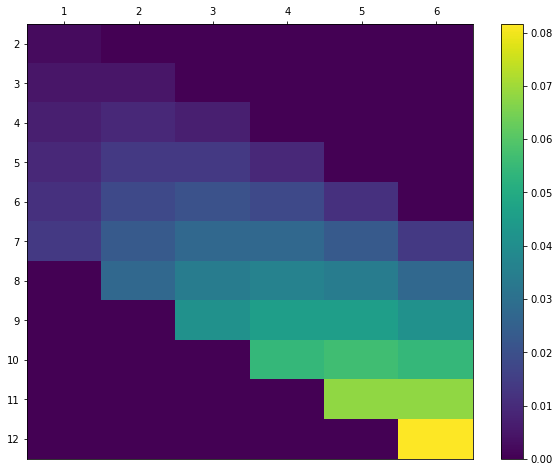

In [190]:
# 결합분포관련 히트맵 그리기

prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

# 히트맵
c = ax.pcolor(prob)

# 눈금 위치 조정
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor = False)

# 눈금 라벨 조정
# ax.set_xticklabels(np.arange(1,7), minor = False) #실제로는 y값
ax.set_xticklabels(y_set, minor = False)
# ax.set_yticklabels(np.arange(2,13), minor = False) #실제로는 x값
ax.set_yticklabels(x_set, minor = False)


# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킴
ax.invert_yaxis()

# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()

fig.colorbar(c, ax=ax)
plt.show()

In [191]:
np.all(prob >= 0)

True

In [192]:
np.sum(prob)

1.000

#### 주변확률분포
- 결합함수 Fxy에서 확률변수 Y가 취할 수 있는 값 모두를 대입하고 y의 영향을 제거한 것이 Fx(x), x의 주변확률분포임
    - <b>{(xi, yi)| i = 1,2,...;, j = 1,2,...;}</b>
    - <b>P(X = xi, Y = yi) = pij      (i = 1,2,...;, j = 1,2,...;)</b>
    - <b>Fx(x) = ΣFxy(x,yi)</b>
    - <b>Fy(y) = ΣFxy(xi,y)</b>
    

    - EX) 
     
     
         X: A주사위 눈 + B주사위 눈,    Y: A주사위 눈
         
         X = {2,3,4,5,6,7,8,9,10,11,12}
         Y = {1,2,3,4,5,6}
         
         만약 x가 9이고 y가 4라면 A주사위가 4, B주사위가 5인 결합확률을 구하는 것. 
         즉, 4/21 * 5/21 = 20/441
         
         따라서,
         Fxy(x,y) = y(x-y)/441 (y in {1,2,3,4,5,6}, x-y in {1,2,3,4,5,6}
                  = 0          (otherwise)

In [193]:
# 주변확률값 구하는 함수 생성

def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])


# (X,Y dataset과 X,Y에 부여할 주변확률값를 지정해주는 함수) SET 만들기
X = [x_set, f_X]
Y = [y_set, f_Y]

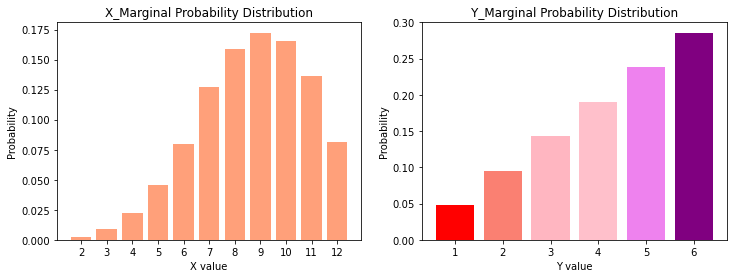

In [194]:
# 주변확률분포 막대그래프 그리기

prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# x의 주변확률분포 막대그래프 그리기
ax1.bar(x_set, prob_x, color = 'lightsalmon')

ax1.set_title('X_Marginal Probability Distribution')
ax1.set_xlabel('X value')
ax1.set_ylabel('Probability')
ax1.set_xticks(x_set)

# y의 주변확률분포 막대그래프 그리기
ax2.bar(y_set, prob_y, color = ['red','salmon','lightpink','pink','violet','purple'])

ax2.set_title('Y_Marginal Probability Distribution')
ax2.set_xlabel('Y value')
ax2.set_ylabel('Probability')
ax2.set_xticks(y_set)

plt.show()

####  2차원 이산형 확률변수의 지표

- <b> 1. E(X) </b>
    - E(X) = ΣΣxiFxy(xi,yj)

In [195]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

- <b> 1. E(X,Y) </b>
    - E(g(X,Y)) = ΣΣg(xi,yj)fxy(xi, yj)

In [196]:
# x값, y값 지정
x_set = np.arange(2,13)
y_set = np.arange(1,7)

# 결합확률값 지정
def f_XY(x,y):
    if 1 <= y <=6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else:
        return 0
    
# (X dataset, Y dataset 과 X,y에 부여할 결합확률값를 지정해주는 함수) SET 만들기
XY = [x_set, y_set, f_XY]

In [197]:
# X, Y의 기댓값

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [198]:
# X의 기댓값

mean_X = E(XY, lambda x, y : x)
mean_X

8.667

In [199]:
# Y의 기댓값

mean_Y = E(XY, lambda x, y : y)
mean_Y

4.333

- <b>1-2. 기댓값의 선형성</b>
    - E(aX + bY) = aE(X) + bE(Y)

In [200]:
E(XY, lambda x, y: 2*x + 3*y)

30.333

In [201]:
2 * E(XY, lambda x,y: x) + 3 * E(XY, lambda x,y: y)

30.333

- <b> 2. V(X), V(Y) </b>
    - V(X) = ΣΣ(xi-xm)^2Fxy(xi,yj)
    - V(Y) = ΣΣ(yi-ym)^2Fxy(xi,yj)

In [202]:
np.sum([(x_i - mean_X)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

4.444

- <b> 2_2. V(X,Y) </b>
    - V(X,Y) = ΣΣ(g(xi, yi)-E(g(X,Y)))^2Fxy(xi,yj)

In [203]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([( g(x_i, y_j) - mean)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set ]) 

In [204]:
var_X = V(XY, g = lambda x, y : x)
var_X

4.444

In [205]:
var_Y = V(XY, g = lambda x, y : y)
var_Y

2.222

- <b> 3. COV(X,Y) </b>
    - Cov(X,Y) = ΣΣ(xi - xm)(yj - ym)Fxy(xi, yj)

In [206]:
def Cov(XY):
    mean_X = E(XY, g = lambda x, y: x)
    mean_Y = E(XY, g = lambda x, y: y)
    return np.sum([ (x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set ])

In [207]:
cov_xy= Cov(XY)
cov_xy

2.222

- <b>분산과 공분산의 공식</b>
    - V(aX + bY) = a^2V(X) + b^2V(Y) + 2abCov(X,Y)

In [208]:
V(XY, g = lambda x, y: 2*x + 3*y)

64.444

In [209]:
2**2 * var_X + 3**2 * var_Y + 12 * Cov(XY)

64.444

- <b>상관계수</b>
    - Corr(X,Y) = Cov(XY)/Var(X)^1/2 * Var(Y)^1/2

In [210]:
Cov(XY) / np.sqrt(V(XY, lambda x,y: x) * V(XY, lambda x,y:y))

0.707

### 과제

#### 1차원 이산형 확률변수
1차원 이산형 확률변수의 변환 사례를 생성하여 기댓값의 선형성과 분산의 공식을 입증하세요.

In [212]:
import numpy as np
np.random.seed(0)

print('=================================================')

# 1차원 이산형 확률변수 생성
x = np.random.choice(list(range(50,100)),1000)
prob = [ i/np.sum(x) for i in x ]


# 기댓값
## 방법1: 함수 생성
def E(X, g = lambda x: x):
    return np.sum( g(i) * (i / np.sum(X)) for i in X)

EX1_1 = E(x)
print('첫번째 방법으로 기댓값 구하기: ', EX1_1.round(2))


## 방법2
EX1_2 = np.sum([ i * (i / np.sum(x)) for i in x ])
print('두번째 방법으로 기댓값 구하기: ', EX1_2.round(2))


# 분산
def V(X, g = lambda x: x):
    return np.sum( (i - E(X))**2 *(i/np.sum(X))  for i in X )

Var_1_1 = V(x, lambda x: x)
print('첫번째 방법으로 분산 구하기: ', Var_1_1.round(2))



print('=================================================')

# 변환 사례: 3x + 3
# x2 = 3* x + 3
# prob2 = [ i/np.sum(x2) for i in x2 ]

# 기댓값
## 방법1
EX2_1 = E(x, g = lambda x: 3*x + 3)
print('첫번째 방법으로 기댓값 구하기: ', EX2_1.round(2))

## 방법2
EX2_3 = 3 * EX1_1 + 3
print('세번째 방법으로 기댓값 구하기: ', EX2_3.round(2))


# 분산
## 방법1
Var_2_1 = V(x2, g = 3*x + 3)
print('첫번째 방법으로 분산 구하기: ', Var_2_1.round(2))

## 방법2: 선형성
Var_2_2 = 9*Var_1_1
print('두번째 방법으로 분산 구하기: ', Var_2_2.round(2))

print('=================================================')

첫번째 방법으로 기댓값 구하기:  76.97
두번째 방법으로 기댓값 구하기:  76.97
첫번째 방법으로 분산 구하기:  200.74
첫번째 방법으로 기댓값 구하기:  233.92
세번째 방법으로 기댓값 구하기:  233.92


NameError: name 'x2' is not defined

#### 2차원 이산형 확률변수
 2차원 이산형 확률변수의 변환 사례를 생성하여 기댓값의 선형성과 분산과 공분산의 공식을 입증하세요.

In [213]:
# y값 지정: a주사위눈
y = [1,2,3,4,5,6]

# x값 지정: a주사위눈 * b주사위눈
x = []
for i in range(1,7):
    for j in range(1,7):
        x.append(i*j)
x = sorted(list(set(x)))


# x의값 확률, y값 확률 구하는 함수 생성
def f_XY(x,y,g):
    if (1<= x <= 6) and (1 <= y/x <= 6):
        return x/21*(y/x)/21
    else:
        return 0
    

# 기댓값 구하기
def E_XY(XY, g):
    x, y, f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j) for x_i in x for y_j in y])


# 분산 구하기
def V(XY, g):
    x, y, f_XY = XY
    mean = E_XY(XY)
    return np.sum([(g(x_i, y_j) - mean)**2 * f_XY(x_i, y_j) for x_i in x for y_j in y])



## 대표적인 이산형 확률분포

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

### 이산형 확률분포 성질 확인하는  E(X), V(X), Check_Prob, Plot_Prob 함수 생성

In [215]:
linestyles = ['-', '--', ':']

def E(X, g = lambda x: x):
    x_set, f = X
    return np.sum([g(x_i) * f(x_i) for x_i in x_set])

def V(X, g = lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_i) - mean)**2*f(x_i) for x_i in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_i) for x_i in x_set])
    assert np.all(prob >= 0), 'Minus Probability'
    prob_sum = np.sum(prob).round(6)
    assert prob_sum == 1, f'Sum of Probability{prob_sum}'
    
    print(f' Expected value: {E(X):.4f}')
    print(f' Variance: {V(X):.4f}')
    
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_i) for x_i in x_set])
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    
    randomcolor = np.random.choice(['pink','salmon','purple','lightblue','skyblue','lightgreen'],1)
    # 확률을 막대그래프로 표현
    ax.bar(x_set, prob, label = 'Probability', color = randomcolor)
    # 평균값을 수직선으로 표현
    ax.vlines(E(X), 0, 1, label = 'Mean', color = 'black')
    
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()    

### 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라하며 1이 나오면 성공 0이 나오면 실패라고 함
- f(x) = $p^x(1-p)^{1-x}$ $(x \in \{0,1\}$)         
       = 0                     (otherwise)
    
    ex) 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률
    
<b>X ~ B(p)</b>    
- E(X) = p 
- V(X) = p(1-p)

In [216]:
# 베르누이의 x dataset, p(x)반환하는 함수 생성
def Bern(p):
    x_set = np.array([0,1])
    
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
    
    return x_set, f

In [217]:
# 성공확률이 0.3인 베르누이분포의 기댓값, 분산 확인하기

p = 0.3
X = Bern(p)

check_prob(X)

 Expected value: 0.3000
 Variance: 0.2100


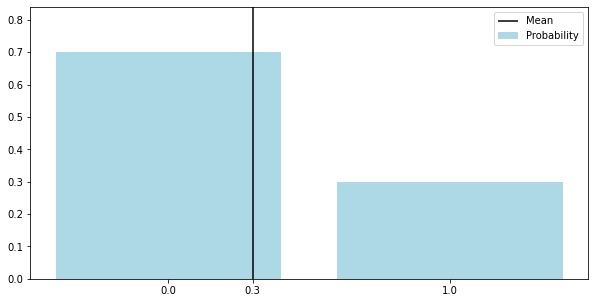

In [218]:
# 성공확률이 0.3인 베르누이분포의 분포 그려보기

plot_prob(X)

In [219]:
# 베르누이 분포를 따르는 확률변수를 생성할 수 있는 bernoulli함수 사용
rv = stats.bernoulli(p)

In [220]:
# 해당 변수값의 확률값을 반환하는 pmf(확률함수)메서드 사용
##방법1
print(f'실패확률: {rv.pmf(0)}, 성공확률: {rv.pmf(1)}')

##방법2
print(f'실패확률: {rv.pmf([0,1])[0]}, 성공확률: {rv.pmf([0,1])[1]}')

실패확률: 0.7, 성공확률: 0.3
실패확률: 0.7, 성공확률: 0.3


In [221]:
# 해당 변수값의 확률값을 누적해서 반환하는 cdf(누적밀도함수)메서드 사용

print(f'실패확률, 전체확률: {rv.cdf([0,1])}')

실패확률, 전체확률: [0.7 1. ]


In [222]:
# 해당 분포의 기댓값, 분산 계산

print(f'기댓값: {rv.mean()}, 분산:{rv.var()}')

기댓값: 0.3, 분산:0.21


### 이항분포
- 성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포  
- f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,..,n\}$) 
       = 0                     (otherwise)
       

<b>X ~ B(n,p)</b>
- E(X) = np
- V(X) = np(1-p)




In [223]:
from scipy.special import comb

# 이항분포의 x dataset, p(x)반환하는 함수 생성 
def Bin(n, p):
    x_set = np.arange(n + 1)
    
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [224]:
# 시행횟수가 10, 성공확률이 0.3인 이항분포의 기댓값, 분산 확인하기

n = 10
p = 0.3

X = Bin(n,p)

check_prob(X)

 Expected value: 3.0000
 Variance: 2.1000


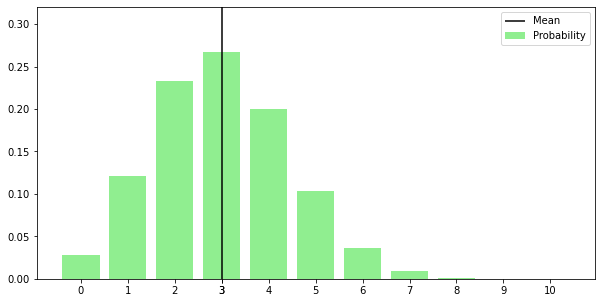

In [225]:
plot_prob(X)

막대그래프와 수직선(평균) 그래프를 그려보면, 기댓값이 정상이 되는 산 모양의 분포를 이룸

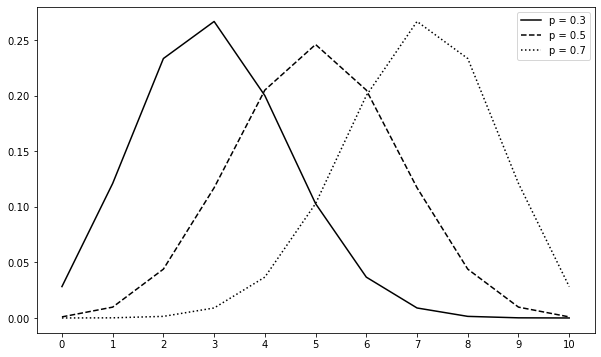

In [226]:
# 시행횟수는 10으로 고정, p = [0.3, 0.5, 0.7]이 되도록 해서 그래프 그려보기

from scipy.stats import binom


fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)


x_set = np.arange(n + 1)
linestyles = ['-', '--', ':']
randomcolor = np.random.choice(['pink','red','purple','blue','green','gray','black'])

for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    # 이항분포를 따르는 확률변수를 생성할 수 있는 binom함수 사용
    rv = stats.binom(10, p)
    ax.plot(x_set, rv.pmf(x_set), ls = ls, color = randomcolor, label = f'p = {p}')

ax.set_xticks(x_set)
ax.legend()


plt.show()

p값이 커질수록, 정상이 되는 변수값이 커짐

p = 0.5 일 때 좌우대칭 형태로 분포하게 됨

### 기하분포

- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기  

f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3,..\})$

       0              (otherwise) 

<b>X ~ Ge(p)</b>
- E(X) = $1/p$
- V(X) = $(1-p)/p^2$

In [227]:
# 성공확률이 0.5인 기하분포의 기댓값, 분산 확인하기

p = 0.5
X = Ge(p)

check_prob(X)

 Expected value: 2.0000
 Variance: 2.0000


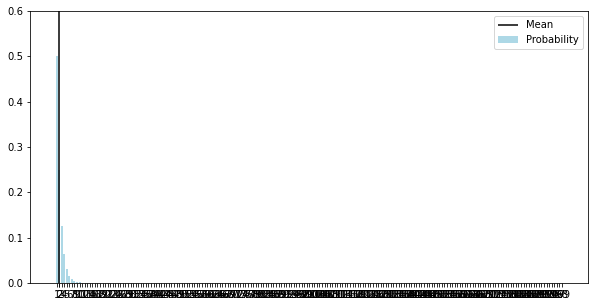

In [228]:
plot_prob(X)

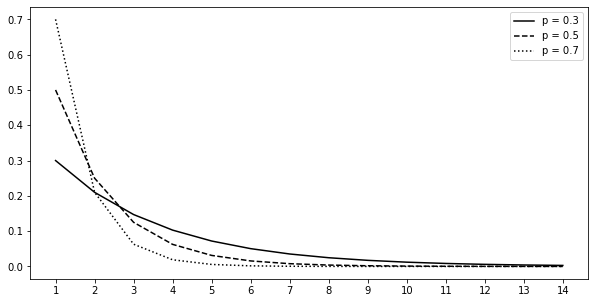

In [229]:
# 시행횟수는 1 ~ 14로 제한, p = [0.3, 0.5, 0.7]이 되도록 해서 그래프 그려보기

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

x_set  = np.arange(1,15)

linestyles = ['-', '--', ':']
randomcolor = np.random.choice(['pink','red','purple','blue','green','gray','black'])

for p, ls in zip([0.3, 0.5, 0.7],linestyles):
    # 기하분포를 따르는 확률변수를 생성할 수 있는 geom함수 사용
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), ls = ls, color = randomcolor, label = f'p = {p}')
    
    ax.set_xticks(x_set)
    ax.legend()

p값에 상관없이 변수값이 커지면 지수적으로 감소하는 분포가 되며, 0에 수렴함

### 포아송분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
    
    ex) 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 건수는 Poi(2)를 따른다.  
    
        P(X=0) = 2!/0! * $e^{-2}$ = 0.135


f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

     =  0               (otherwise)
     
     

<b>X ~ Poi($\lambda$)</b>
- E(X) = $\lambda$
- V(X) =  $\lambda$
- 포아송 분포의 기댓값과 분산을 모두 $\lambda$ 가 된다.  


In [230]:
# 포아송분포의 x dataset, p(x)반환하는 함수 생성 
## 편의상 n은 1 ~ 19까지로 함

from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    
    def f(x):
        if x in x_set:
            return np.power(lam, x)/ factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f


In [231]:
# 단위면적당 평균 발생건수가 3건인 포아송분포의 기댓값, 분산 확인하기

lam = 3
X = Poi(lam)

check_prob(X)

 Expected value: 3.0000
 Variance: 3.0000


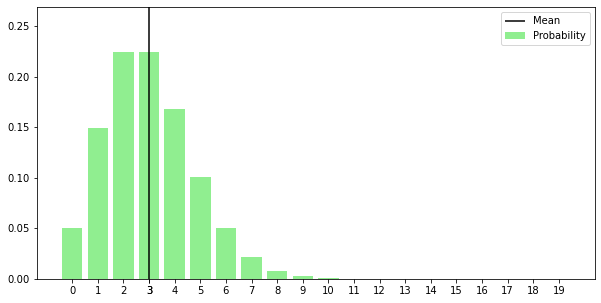

In [232]:
plot_prob(X)

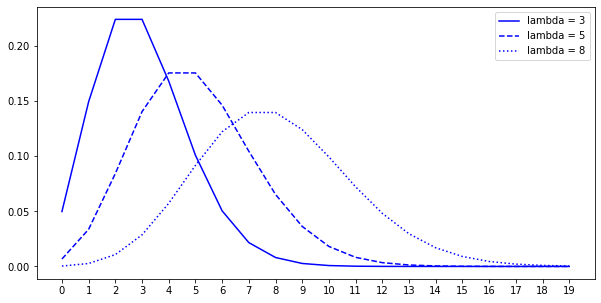

In [233]:
# 단위면적당 발생건수는 1 ~ 19건, 평균 발생건수 = [3, 5, 8]일 때 그래프 그려보기

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

x_set = np.arange(20)

linestyles = ['-', '--', ':']
randomcolor = np.random.choice(['pink','red','purple','blue','green','gray','black'])

for lam, ls in zip([3, 5, 8],linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set), ls = ls, color = randomcolor, label = f'lambda = {lam}')

ax.set_xticks(x_set)
ax.legend()

plt.show()

### 과제

In [234]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 기댓값
def E(X, g = lambda x: x):
    x_dataset, f = X

    return np.sum(g(x_i) * f(x_i) for x_i in x_dataset)

# 분산
def V(X, g = lambda x: x):
    x_dataset, f = X
    EX = E(X, g)
    
    return np.sum((g(x_i) - EX)**2 * f(x_i) for x_i in x_dataset)
    
    
#기댓값, 분산 checkcheck    
def check_prob(X):
    x_dataset, f = X
    x_probability = np.array([f(x_i) for x_i in x_dataset])
    assert np.all(x_probability >= 0), f'※ 음수{np.where(x_probability >= 0)}를 가지는 확률이 있음.' 
    
    x_prob_sum = np.sum(x_probability).round(4)
    assert x_prob_sum == 1, f'※ 확률의 합이 {x_prob_sum}임.'
    
    print(f' 기댓값: {E(X):.2f}')
    print(f' 분산:   {V(X):.2f}')

#### 과제: 베르누이분포
베르누이분포의 사례를 생성하여 각각의 경우에 대한 기댓값과 분산을 산출하세요.

In [235]:
# 사례: 배가 침몰 시 생존율(P)은 0.38197임

def Bern(p):
    x_dataset = np.array([0,1])
    
    def f(x):
        if x in x_dataset:    
            return p**x * (1-p)**(1-x)
            
    return x_dataset, f
    
X = Bern(0.38197)
check_prob(X)

 기댓값: 0.38
 분산:   0.24


#### 과제: 이항분포
이항분포의 사례를 생성하여 각각의 경우에 대한 기댓값과 분산을 산출하세요.

In [236]:
# 사례: 제조회사에서 부품의 불랑품 제조율(P)은 0.05%임. 부품 200개(N)를 조사했을 때의 불량품 개수의 기댓값과 분산은?  

from scipy.special import comb 

def Binom(n,p):
    x_dataset = np.arange(n + 1)
    
    def f(x):
        if x in x_dataset:
            return comb(n,x) * p**(x) * (1-p)**(n-x)
        else:
            return 0
        
    return x_dataset, f

X = Binom(200, 0.05)
check_prob(X)

 기댓값: 10.00
 분산:   9.50


#### 과제: 기하분포
기하분포의 사례를 생성하여 각각의 경우에 대한 기댓값과 분산을 산출하세요.

In [237]:
#사례: 내가 야구장에서 홈런칠 확률(P)은 0.05임. 내가 홈런을 칠 확률에 대한 기댓값과 분산은?

def Ge(p):
    x_dataset = np.arange(1,200)
    
    def f(x):
        if x in x_dataset:
            return (1-p)**(x-1) * p
        else:
            return 0
        
    return x_dataset, f

X = Ge(0.05)
check_prob(X)

 기댓값: 19.99
 분산:   378.52


#### 과제: 포아송분포
포아송분포의 사례를 생성하여 각각의 경우에 대한 기댓값과 분산을 산출하세요.

In [238]:
# 사례: 택배회사의 전화 상담실에 1시간당 평균 240건의 전화요청이 들어옴. 그럼 1분 동안 걸려올 전화요청의 기댓값과 분산은?

from scipy.special import factorial

def Poi(lam):
    x_dataset = np.arange(20)
    
    def f(x):
        if x in x_dataset:
            return (np.power(lam, x) * np.exp(-lam))/factorial(x)
        else:
            return 0
    return x_dataset, f

X = Poi(4)

check_prob(X)

 기댓값: 4.00
 분산:   4.00
